In [1]:
import pandas as pd
import numpy as np
import workdays
from xbbg import blp
import pdblp
import datetime
import matplotlib.pyplot as plt

In [2]:
def f(T):
    tmp = []
    for i in range(len(T)):
        tmp  += [(blp.bdh(T[i], 'px_last', '19991201', '20240101', Per='Q').reset_index().iloc[0,0]).strftime('%Y%m')]
    return tmp


List = [
    ['VIX', 'ES'],
    ['VXN', 'NQ'],
    ['RVX', 'RTY'],
    ['V2X', 'VG'],
    ['V1X', 'GX'],
    ['VNKY', 'NK'],
    ['INVIXN', 'NZ'],
    ['VHSI', 'HI'],
    ['AS51VIX', 'XP'],
    ['VKOSPI', 'KM'],
    ['VIXI', 'PT']
]
       
columns = ['IV','Future']
List = pd.DataFrame(List, columns=columns)

T = List['IV'] + ' Index'
df_BDP = blp.bdp(tickers=T, flds=['name','country_iso']).loc[T,:]

List.insert(1, 'Name', df_BDP['name'].tolist())
List.insert(2, 'Country', df_BDP['country_iso'].tolist())
List.insert(3, 'StartDate', f(T))


T = List['Future'] + 'A Index'
df_BDP = blp.bdp(tickers=T, flds=['name','country_iso','undl_spot_ticker']).loc[T,:]
List.insert(List.shape[1], 'Stock', df_BDP['undl_spot_ticker'].tolist())


T = List['Future'] + '1 Index'
List['F_StartDate'] = f(T)


tmp = ['StartDate', 'F_StartDate']
List[tmp] = List[tmp].replace('199912', '-')

List

,IV,Name,Country,StartDate,Future,Stock,F_StartDate
0,VIX,Cboe Volatility Index,US,-,ES,SPX,-
1,VXN,Cboe NDX VOLATILITY INDX,US,200103,NQ,NDX,-
2,RVX,Cboe RSL2000 VOLATILTY I,US,200403,RTY,RTY,201709
3,V2X,VSTOXX Index,EU,-,VG,SX5E,-
4,V1X,VDAX,DE,-,GX,DAX,-
5,VNKY,NIKKEI Volatility Index,JP,200103,NK,NKY,-
6,INVIXN,India NSE Volatility IX,IN,200712,NZ,NIFTY,200006
7,VHSI,HSI Volatility Index,HK,200103,HI,HSI,-
8,AS51VIX,S&P/ASX 200 VIX Index RT,AU,200803,XP,AS51,200006
9,VKOSPI,KOSPI200 VOLATILITY INDX,KR,200303,KM,KOSPI2,-


In [3]:
List = List[~List['Country'].isin(['KR','CA','AU'])]
List

,IV,Name,Country,StartDate,Future,Stock,F_StartDate
0,VIX,Cboe Volatility Index,US,-,ES,SPX,-
1,VXN,Cboe NDX VOLATILITY INDX,US,200103,NQ,NDX,-
2,RVX,Cboe RSL2000 VOLATILTY I,US,200403,RTY,RTY,201709
3,V2X,VSTOXX Index,EU,-,VG,SX5E,-
4,V1X,VDAX,DE,-,GX,DAX,-
5,VNKY,NIKKEI Volatility Index,JP,200103,NK,NKY,-
6,INVIXN,India NSE Volatility IX,IN,200712,NZ,NIFTY,200006
7,VHSI,HSI Volatility Index,HK,200103,HI,HSI,-


In [4]:
d_from = workdays.workday(datetime.datetime.today(), days=-260*2).strftime('%Y%m%d')
d_to = workdays.workday(datetime.datetime.today(), days=-1).strftime('%Y%m%d')
T = [x + ' Index' for x in List['IV'] ]
df0 = blp.bdh(T, ['px_last'], d_from, d_to, Calendar='5D', Fill='P')[T].reset_index()
df0.columns = ['Date'] + List['Future'].tolist()
display(df0.head())

# Implied volatility is only available for US futures.
T = [x + '1 Index' for x in List['Future'] ]
df1 = blp.bdh(T, ['hist_put_imp_vol'], d_from, d_to, Calendar='5D', Fill='P')[T].reset_index()
df1.columns = ['Date'] + List['Future'].tolist()
display(df1.head())

# Implied volatility is available for some ETFs.
T = ['ES1 Index','SPY US Equity']
df2 = blp.bdh(T, ['hist_put_imp_vol'], d_from, d_to, Calendar='5D', Fill='P')[T].reset_index()
df2.columns = ['Date'] + [x.split()[0] for x in T]
display(df2.head())

,Date,ES,NQ,RTY,VG,GX,NK,NZ,HI
0,2022-11-28,22.21,28.31,26.80,21.5230,21.80,18.53,13.5650,32.46
1,2022-11-29,21.89,28.36,26.15,21.7003,21.97,18.71,13.6150,34.32
2,2022-11-30,20.58,26.46,24.70,21.2104,21.75,18.93,13.8075,34.51
3,2022-12-01,19.84,26.09,24.19,20.3191,21.06,18.84,13.3600,33.54
4,2022-12-02,19.06,24.78,23.14,19.3283,20.33,19.89,13.4500,32.55


,Date,ES,NQ,RTY,VG,GX,NK,NZ,HI
0,2022-11-28,21.82,28.08,26.31,NaN,NaN,NaN,NaN,NaN
1,2022-11-29,22.35,29.12,26.67,NaN,NaN,NaN,NaN,NaN
2,2022-11-30,21.11,27.51,25.47,NaN,NaN,NaN,NaN,NaN
3,2022-12-01,20.75,27.21,24.86,NaN,NaN,NaN,NaN,NaN
4,2022-12-02,19.96,26.09,23.71,NaN,NaN,NaN,NaN,NaN


,Date,ES1,SPY
0,2022-11-28,21.82,20.928
1,2022-11-29,22.35,20.515
2,2022-11-30,21.11,19.112
3,2022-12-01,20.75,18.580
4,2022-12-02,19.96,17.098


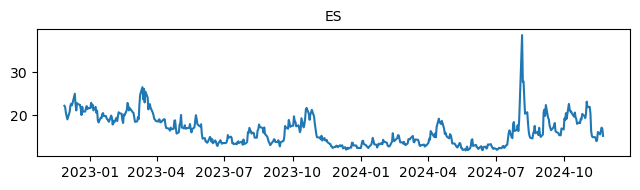

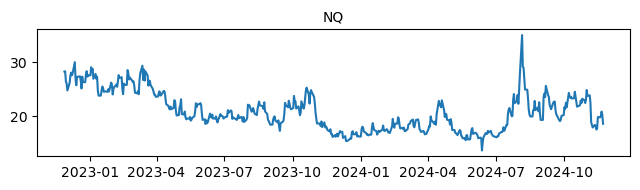

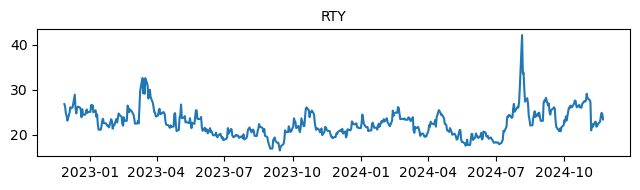

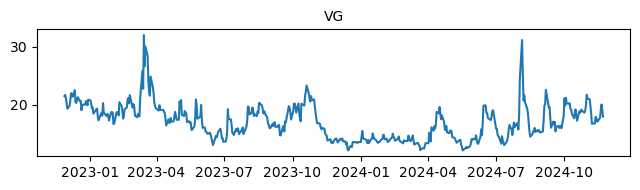

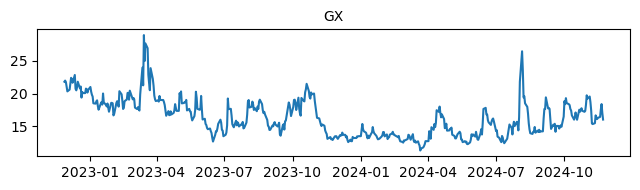

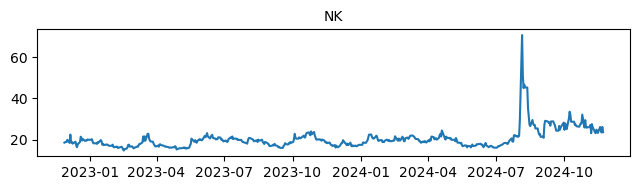

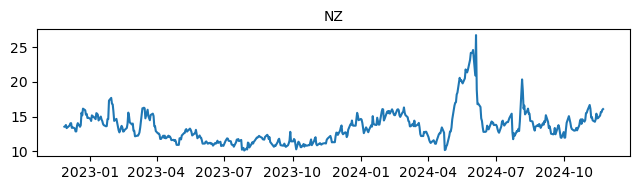

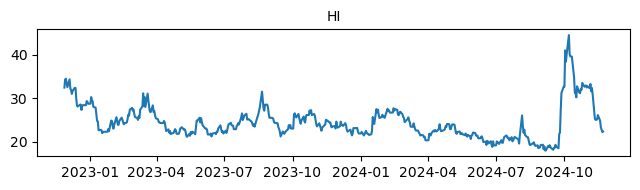

In [5]:
def Plot(title='', c='' ,l='', axhline='', m='', ymin=None, ymax=None):
    fig, ax = plt.subplots(figsize=(6.5, 2))
    ax.plot(df['Date'], df[c], label=l, marker=m)
    ax.set_title(title, fontsize=10)
    if axhline != '':
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    if l != "":
        ax.legend(loc='best')
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)
    plt.tight_layout()
    plt.show()


df = df0.copy()
for i in List['Future']:
    Plot(i,i)

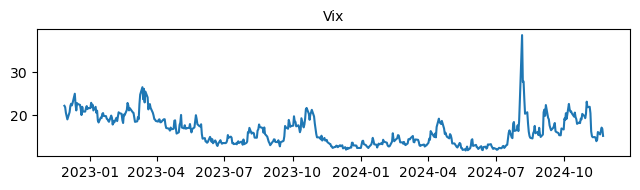

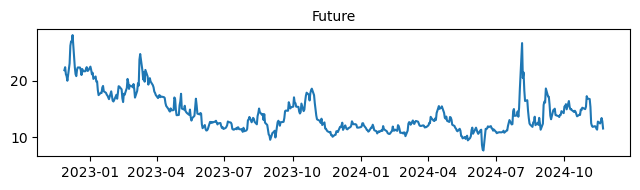

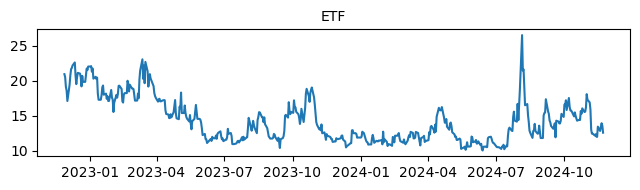

In [6]:
# Vix vs IV in Futures and ETF
df = df0.copy()
Plot('Vix','ES')
df = df2.copy()
Plot('Future','ES1')
Plot('ETF','SPY')